In [1]:
import numpy as np
from typing import List, Tuple
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import os, sys
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
data_path = '/home/tjy/repos/red-bag-data/all-csv/'

data_files = []
filenames = os.listdir(data_path)
for f in filenames:
    if '.csv' in f:
        data_files.append(os.path.join(data_path, f))

dfs: List[pd.DataFrame] = [pd.read_csv(f) for f in data_files]
dfs[0]

,order,value
0,0,1.23
1,1,6.29
2,2,12.43
3,3,4.13
4,4,1.10
5,5,0.81
6,6,4.73
7,7,10.97
8,8,12.90
9,9,11.41


In [3]:
n_trials = len(dfs)
data_dict = {'order': [i for i in range(10)]}

for i in range(n_trials):
    data_dict['trial_{}'.format(i)] = dfs[i]['value'].tolist()
data = pd.DataFrame(data_dict)
data.set_index('order', inplace=True)
np.savetxt('trials.csv', data.values)
# data

# histogram

In [4]:
def plot_hist_for_players(data: pd.DataFrame):
    fig, axs = plt.subplots(3, 4)
    fig.set_size_inches(10.24, 10.24)
    axs = axs.flat
    xlim = np.max(data.values)
    histogram = [np.histogram(data.iloc[i,].values) for i in range(10)]
    hist = [h[0] for h in histogram]
    bins = [h[1] for h in histogram]
    ylim = np.max(hist)
    for i in range(10):
        axs[i].hist(data.iloc[i,], bins=bins[0])
        axs[i].set_title('hist of {}-th'.format(i))
        axs[i].set_xlim([0, xlim])
        axs[i].set_ylim([0, ylim])
    plt.show()

# plot_hist_for_players(data)

# Data profile

In [5]:
data_dict = {}

data_profile = pd.DataFrame(
    {
        'mean': data.mean(axis=1),
        'std': data.std(axis=1),
        'median': data.median(axis=1),
        'min': data.min(axis=1),
        'max': data.max(axis=1),
    }
)

data_profile

,mean,std,median,min,max
order,,,,,
0,6.52445,3.823247,6.510,0.66,13.17
1,7.01465,3.621468,6.860,0.62,14.49
2,6.51755,3.894147,6.175,0.55,14.76
3,6.35785,3.932249,6.220,0.54,16.63
4,6.58260,3.900200,6.525,0.52,16.33
5,6.61805,4.075096,7.170,0.50,19.27
6,6.51600,4.089039,6.465,0.42,22.40
7,6.56475,4.345045,5.935,0.36,20.58
8,7.22375,4.875636,6.460,0.19,22.37


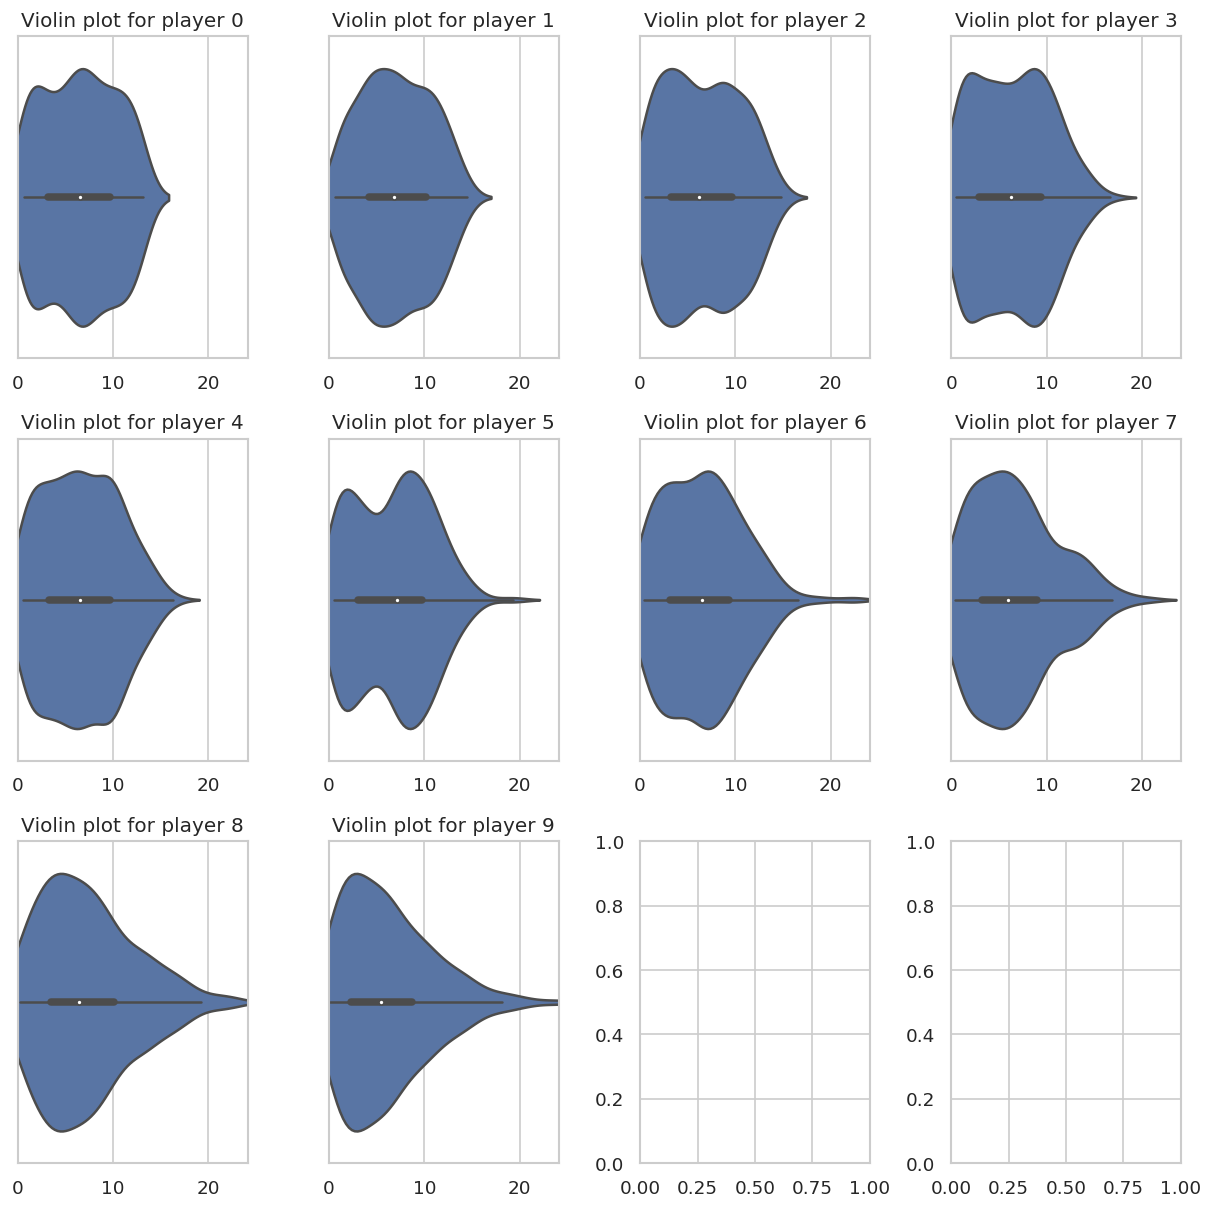

In [22]:
def boxplot(data: pd.DataFrame):
    fig, axs = plt.subplots(3, 4)
    fig.set_size_inches(10.24, 10.24)
    axs = axs.flat
    lim = np.max(data.values)
    for i in range(10):
        sns.violinplot(data.values[i,], ax=axs[i])
        title = 'Violin plot for player {}'.format(i)
        axs[i].set_title(title)
        axs[i].set_xlim([0, lim])
    fig.tight_layout()
    plt.savefig('violin-plot.png')
    plt.show()

boxplot(data)

# Luckiest Players & Least Lucky Players

In [7]:
def plot_lucky_n_unlucky_players(data_lucky: pd.DataFrame, data_unlucky: pd.DataFrame, bar_width: float = 0.35):
    labels = [str(i) for i in range(10)]
    lucky = data_lucky.values.flatten().tolist()
    unlucky = data_unlucky.values.flatten().tolist()
    fig, ax = plt.subplots()
    ax.bar(labels, lucky, width=bar_width, label='Lucky')
    ax.bar(labels, unlucky, width=bar_width, bottom=lucky,
           label='Unlucky')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Player order')
    ax.set_title('Count of luckiest and unluckiest players')
    ax.legend()
    plt.show()

# plot_lucky_n_unlucky_players(luckiest_player, unluckiest_player)